<a href="https://colab.research.google.com/github/miteshgaonkar/bert-topics/blob/main/Copy_of_bert_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup environment

To make sure your colab doesn't disconnect due to inactivity, you can paste this code in the console of this tab (*right mouse click -> inspect -> Console tab and insert code*).

```
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}

setInterval(ConnectButton,60000);
```

### Requirements

In [ ]:
# for topic models
!pip install -U gensim
!pip install pyLDAvis
!pip install biterm

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install sentence_transformers==0.2.5.1
!pip install transformers==2.3.0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m textblob.download_corpora

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


### Imports

In [ ]:
import pandas as pd
import numpy as np
import itertools
import random
from pathlib import Path
import json
import time
import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import re
import math

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# clustering / topic model modules
from sklearn.cluster import KMeans
from collections import Counter
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob, Word
import time

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# neural network modules
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from transformers import (BertTokenizer, BertModel, BertPreTrainedModel, AdamW,
                          get_linear_schedule_with_warmup,
                          )

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# lda modules
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import pyLDAvis
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# btm modules
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms, topic_summuary
from biterm.btm import oBTM

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# coherence modules

from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# data downloading
import requests
from zipfile import ZipFile

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# types
from typing import List, Tuple, Dict

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# plots
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from IPython.display import Image

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Download data

### Winter Storm Jacob 2020

In [ ]:
nlwx_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1wYsKTuKabfS7wrVYJ1yu9Sk0cHF7BDhN')
#The above block of code is reading a CSV file from a Google Drive link and storing it as a pandas DataFrame object in the variable nlwx_df. The link in the code is a download link for a CSV file stored in Google Drive, and the pd.read_csv() function from the pandas library is used to read the CSV data and create a DataFrame object

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#nlwx_df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### CrisisNLP
Dowload CrisisNLP tweets (annotated by paid workers on crowdflower). 

For more information on dataset see: https://crisisnlp.qcri.org/lrec2016/lrec2016.html

In [ ]:
# download already filtered/split datasets
CRISIS_NLP_URL = 'https://drive.google.com/uc?export=download&id=1a5eWNUBKYb-RYQ9THU_GLRX2EaBh5spK'
DATA_PATH = Path.cwd()
CRISIS_NLP_PATH = DATA_PATH / "LREC_2016_datasets.zip"

r = requests.get(CRISIS_NLP_URL)
with CRISIS_NLP_PATH.open("wb") as f:
    f.write(r.content)

with ZipFile(CRISIS_NLP_PATH) as z:
    z.extractall(DATA_PATH)

The below code downloads and processes data from the CrisisNLP dataset for text classification tasks. The script downloads a zip file from a URL, extracts the contents of the zip file, and then performs a train-test split on the CSV files in the extracted data directory. The DOWNLOAD_ORIGINAL variable is a boolean flag that determines whether to download the data or not. If it is set to True, the script will download the data; otherwise, it will assume the data has already been downloaded.

The create_train_test_split function takes as input a CSV file path, a label column name, and a split ratio. It reads in the CSV file, shuffles the rows, and then splits the data into train and test sets based on the label column. The function then writes the resulting train and test sets to new CSV files in the same directory as the original file.

The script loops through all the CSV files in the extracted CrisisNLP dataset directory (excluding any that already have "train" or "test" in their file names), calls the create_train_test_split function on each CSV file, and outputs the label distribution of the resulting train and test sets.

In [ ]:
# The following code downloads and processes data from the CrisisNLP dataset for text classification tasks. 
# The script downloads a zip file from a URL, extracts the contents of the zip file, 
# and then performs a train-test split on the CSV files in the extracted data directory. 
# The DOWNLOAD_ORIGINAL variable is a boolean flag that determines whether to download the data or not. 
# If it is set to True, the script will download the data; otherwise, it will assume the data has already been downloaded.
# download and split original data from CrisisNLP (might be rate-limited)
DOWNLOAD_ORIGINAL = False 

if DOWNLOAD_ORIGINAL:
    DATA_PATH = Path.cwd()
    CRISIS_NLP_PATH = DATA_PATH / "LREC_2016_datasets.zip"

    CRISIS_NLP_URL = "https://crisisnlp.qcri.org/data/lrec2016/labeled_cf/CrisisNLP_labeled_data_crowdflower.zip"
    CRISIS_NLP_DIR = "CrisisNLP_labeled_data_crowdflower"
    label_col = "choose_one_category"

    r = requests.get(CRISIS_NLP_URL)

    with CRISIS_NLP_PATH.open("wb") as f:
        f.write(r.content)

    with ZipFile(CRISIS_NLP_PATH) as z:
        z.extractall(DATA_PATH)

    for zip_file in (DATA_PATH / CRISIS_NLP_DIR).glob("*/*.zip"):
        print(f"unzipping {zip_file}")
        with ZipFile(zip_file) as z:
            z.extractall(zip_file.parent)

    # The create_train_test_split function takes as input a CSV file path, a label column name, and a split ratio. 
    # It reads in the CSV file, shuffles the rows, and then splits the data into train and test sets based on the label column. 
    # The function then writes the resulting train and test sets to new CSV files in the same directory as the original file.
    def create_train_test_split(csv_path: Path, label_col, split: float = 0.8):
        df = pd.read_csv(csv_path, encoding = "ISO-8859-1").sample(frac=1).reset_index(drop=True)
        train_df = pd.DataFrame(columns=df.columns)
        test_df = pd.DataFrame(columns=df.columns)
        train_path = csv_path.parent / f"{csv_path.stem}_train.csv"
        test_path = csv_path.parent / f"{csv_path.stem}_test.csv"
        for label in df[label_col].unique():
            label_df = df.loc[df[label_col] == label]
            train_df = train_df.append(label_df[:int(len(label_df)*split)])
            test_df = test_df.append(label_df[int(len(label_df)*split):])

        print(f"Train set:\n{train_df[label_col].value_counts()}")
        print(f"Test set:\n{test_df[label_col].value_counts()}")
        print("-"*80)
        train_df.to_csv(train_path)
        test_df.to_csv(test_path)

    # The script loops through all the CSV files in the extracted CrisisNLP dataset directory 
    # (excluding any that already have "train" or "test" in their file names), 
    # calls the create_train_test_split function on each CSV file, and outputs the label distribution of the resulting train and test sets.
    split = 0.8
    for csv_path in (DATA_PATH / CRISIS_NLP_DIR).glob("*/*.csv"):
        if "train" in str(csv_path) or "test" in str(csv_path):
            continue
        else:
            print(f"Splitting: {csv_path.parent}")
            create_train_test_split(csv_path, label_col, split)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## FTE Model

### Finetune model

In [ ]:
# skip finetuning and load pre-finetuned model
FINETUNE = False

# Dataloader
BSZ = 8

# Optimizer
LR = 2e-5
EPS = 1e-8 

# Training
N_EPOCHS = 2 # Model converges within 2 epochs

# Random seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)


#FINETUNE: A boolean flag indicating whether to perform fine-tuning of a pre-trained model or just load a pre-finetuned model. It is set to False, indicating that a pre-finetuned model will be loaded.

#BSZ: The batch size of the data loader, which is set to 8.

#LR: The learning rate of the optimizer, which is set to 2e-5.

#EPS: The epsilon value for numerical stability in the optimizer, which is set to 1e-8.

#N_EPOCHS: The number of epochs for training the model, which is set to 2.

#SEED: The random seed for reproducibility of the results. It is set to 42, and then the random seed is set for Python's built-in random module, NumPy, and the random number generators of the CPU and GPU of the PyTorch library.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#The above code block is determining and printing whether the code will use a GPU or CPU for running the deep learning model, and then assigning the device to a variable named device.

#The first line of the code checks whether a CUDA-enabled GPU is available on the machine where the code is running by calling torch.cuda.is_available(). If a GPU is available, the device will be set to "cuda" to use the GPU; otherwise, it will be set to "cpu" to use the CPU.

#The second line of the code prints a message indicating which device is being used, either "cuda" or "cpu".

#The device variable is then assigned the device type, and it will be used in the subsequent code for moving the model and data tensors to the device during the training and inference phases.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using device: cuda


#### Create dataloaders

In [ ]:
# The below code reads in data from the CrisisNLP dataset for text classification tasks. 
# The FINETUNE variable is a boolean flag that determines whether to run this part of the script or not. 
# If it is set to True, the script will read in the data; otherwise, it will assume the data has already been read in.
if FINETUNE:
  # read data
  DATA_PATH = Path.cwd() / "CrisisNLP_labeled_data_crowdflower"
  PATHS = ["2014_California_Earthquake", "2014_Chile_Earthquake_en", 
          "2013_Pakistan_eq", "2014_Hurricane_Odile_Mexico_en",
          "2014_India_floods", "2014_Pakistan_floods", 
          "2014_Philippines_Typhoon_Hagupit_en","2015_Cyclone_Pam_en",
          "2015_Nepal_Earthquake_en"]

# The read_data function that takes as input a directory path, a list of event names, 
# a string indicating whether to read the "train" or "test" data, and column names for the text and label columns in the CSV files. 
# The function reads in the CSV files for each event and concatenates the text and label columns into a list of tuples, 
# where each tuple contains a text string and its corresponding label.
  def read_data(
          data_dir: Path, 
          events: List[str], 
          train_test: str, 
          text_col: str = "tweet_text", 
          label_col: str = "choose_one_category"
          ) -> List[Tuple[str, str]]:
      data = []
      for event in events:
          csv_paths = list((data_dir / event).glob(f"*_{train_test}.csv"))
          assert len(csv_paths) == 1, f"Found files:{csv_paths}\n for event {event}"

          df = pd.read_csv(csv_paths[0], encoding = "ISO-8859-1")
          data.extend(list(zip(df[text_col], df[label_col])))
      return(data)
      
# The code then calls read_data twice to read in the training and validation data for the specified events in the CrisisNLP dataset. 
# The data_train and data_val variables are lists of tuples, where each tuple contains a text string and its corresponding label. 
# Finally, the script prints out the number of examples in each dataset and an example tuple from each dataset.
  data_train = read_data(DATA_PATH, PATHS, "train")
  data_val = read_data(DATA_PATH, PATHS, "test")

  # Note: there seems to be issues with the encoding of the CrisisNLP data
  print(f"Training data: {len(data_train)} examples; e.g. {data_train[0]}")
  print(f"Validation data: {len(data_val)} examples; e.g. {data_val[0]}")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# In the above code, if the FINETUNE flag is set to true, a data loader is created for the BERT-based model. 
# First, a tokenizer is created using the 'bert-base-uncased' pre-trained model. 
# Next, the training and validation labels are extracted from the input data. 
# A dictionary mapping labels to integer indices is created using the training and validation labels. 
# A function called 'create_dataloader' is defined which takes as input the data, tokenizer, label-to-index dictionary, 
# and batch size, and returns a PyTorch dataloader object. 
# The 'create_dataloader' function encodes the input texts using the tokenizer, converts the labels to a PyTorch tensor, 
# and returns a 'TensorDataset' object which is then fed to a PyTorch 'DataLoader' object. 
# Finally, the data loader is created for both training and validation sets using the 'create_dataloader' function.
if FINETUNE:
  # create data loader
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

  train_labels = [tpl[1] for tpl in data_train]
  val_labels = [tpl[1] for tpl in data_val]
  ltoi = {l: i for i,l in enumerate(set(train_labels + val_labels))}

  def create_dataloader(
          data: List[Tuple[str, str]],
          tokenizer: BertTokenizer,
          ltoi: Dict[str, int],
          batch_size: int
          ):
      texts_raw = [tpl[0] for tpl in data]
      d = tokenizer.batch_encode_plus(
          texts_raw, add_special_tokens=True, return_tensors='pt',
      )
      labels = [tpl[1] for tpl in data]
      labels = torch.LongTensor([ltoi[l] for l in labels])

      ds = TensorDataset(d['input_ids'], d['attention_mask'], labels)
      sampler = RandomSampler(ds)
      dataloader = DataLoader(ds, sampler=sampler, batch_size=batch_size)
      return(dataloader)

  train_dataloader = create_dataloader(data_train, tokenizer, ltoi, BSZ)
  val_dataloader = create_dataloader(data_val, tokenizer, ltoi, BSZ)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Initialize model

In [ ]:
# The code defines a PyTorch model class BertForSequenceClassificationOutputPooled, which is a subclass of the BertPreTrainedModel class. 
# This model is designed for sequence classification using the BERT architecture.
class BertForSequenceClassificationOutputPooled(BertPreTrainedModel):
  # The __init__ method initializes the model architecture with a BERT model, a dropout layer, and a linear classifier. 
  # The forward method defines the forward pass of the model. 
  # The inputs are passed through the BERT model, and the output is pooled to create a representation of the input sequence. 
  # This pooled output is passed through the dropout layer and then through the linear classifier to produce logits.
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        self.init_weights()

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
    ):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
        )

        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        outputs = (logits,) + outputs[2:] # add hidden states and attention if they are here
        
        # If labels are provided, the loss is calculated using cross-entropy loss and added to the outputs. 
        # Finally, the method returns the outputs of the model, which include the logits, and optionally the loss, hidden states, and attentions.
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
            outputs = (loss,) + outputs
        
        return outputs  # (loss), logits, (hidden_states), (attentions)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# The code initializes a BERT model for sequence classification using the BertForSequenceClassificationOutputPooled class 
# from the transformers library. 
# The model is loaded with the pre-trained weights from the bert-base-uncased model and configured to have num_labels output labels, 
# with the option to return attention weights and hidden states during inference.
if FINETUNE:

  model = BertForSequenceClassificationOutputPooled.from_pretrained(
      "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
      num_labels = len(ltoi), # The number of output labels.
      output_attentions = True, # Whether the model returns attentions weights.
      output_hidden_states = True, # Whether the model returns all hidden-states.
  ).to(device)


# The optimizer is set to AdamW with a learning rate of LR and epsilon value of EPS. 
# The total number of training steps is calculated by multiplying the number of batches in the training data by the number of epochs. 
# Finally, a linear learning rate scheduler is created that uses no warm-up steps 
# and updates the learning rate based on the total number of training steps. 
# The model is moved to the device (e.g., GPU) for training.
  optimizer = AdamW(model.parameters(), lr=LR, eps=EPS)
  total_steps = len(train_dataloader) * N_EPOCHS
  scheduler = get_linear_schedule_with_warmup(optimizer, 
                                              num_warmup_steps = 0,
                                              num_training_steps = total_steps)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Train model

In [ ]:
# The code defines two helper functions:
# flat_accuracy: calculates the accuracy of predicted labels compared to actual labels, by taking the argmax of the predicted probabilities and comparing it to the corresponding label.
# format_time: converts a given number of seconds into a formatted string representing hours, minutes, and seconds.
if FINETUNE:
  
  def flat_accuracy(preds: np.ndarray, labels: np.ndarray):
      pred_flat = np.argmax(preds, axis=1).flatten()
      labels_flat = labels.flatten()
      return np.sum(pred_flat == labels_flat) / len(labels_flat)
      
  def format_time(seconds: int):
      # Format time as hh:mm:ss
      seconds = int(round((seconds))) 
      return str(datetime.timedelta(seconds=seconds))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# The below code block implements the fine-tuning process for a pre-trained BERT model to classify a set of text documents. 
# The model is trained for a specified number of epochs with a given batch size. 
# The training and validation progress is printed to the console with metrics such as average loss and accuracy. 
# Additionally, the code implements a custom accuracy function and a time formatting function. 
# The code also uses the PyTorch library for optimization and gradient descent.
if FINETUNE:
  
  torch.cuda.empty_cache()

  loss_values = []
  for epoch_i in range(N_EPOCHS):
      print('\n======== Epoch {:} / {:} ========'.format(epoch_i + 1, N_EPOCHS))
      print('Training...')
      model.train()
      total_loss = 0

      t0 = time.time()
      pbar = tqdm(enumerate(train_dataloader), total=len(train_dataloader))
      for step, batch in pbar:
          b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

          model.zero_grad()        
          outputs = model(b_input_ids, 
                          token_type_ids=None, 
                          attention_mask=b_input_mask, 
                          labels=b_labels)

          loss = outputs[0]
          total_loss += loss.item()
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
          
          optimizer.step()
          scheduler.step()

          logits = outputs[1].detach().cpu().numpy()
          label_ids = b_labels.cpu().numpy()
          acc = flat_accuracy(logits, label_ids)
          pbar.set_description(f"Acc: {acc}")

      avg_train_loss = total_loss / len(train_dataloader)            
      loss_values.append(avg_train_loss)
      print("\n  Average training loss: {0:.2f}".format(avg_train_loss))
      print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))


      print("\nRunning Validation...")
      model.eval()
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0
      
      t0 = time.time()
      for batch in val_dataloader:
          b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

          with torch.no_grad():  
              outputs = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask)

          logits = outputs[0]

          logits = logits.cpu().numpy()
          label_ids = b_labels.cpu().numpy()
          tmp_eval_accuracy = flat_accuracy(logits, label_ids)
          eval_accuracy += tmp_eval_accuracy
          nb_eval_steps += 1

      print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
      print("  Validation took: {:}".format(format_time(time.time() - t0)))

      print("")
      print("Training complete!")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Save model

In [ ]:
# If the FINETUNE flag is true, the code creates a directory named "model" in the current working directory, 
# saves the fine-tuned BERT model and the corresponding tokenizer in that directory using the save_pretrained method. 
# This allows the saved model and tokenizer to be loaded and used for inference later.
if FINETUNE:
  
  OUT_PATH = Path.cwd() / "model"
  OUT_PATH.mkdir(parents=True)
  model.save_pretrained(OUT_PATH)
  tokenizer.save_pretrained(OUT_PATH)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Embed tweets

#### Initialize model

In [ ]:
# Initializing the pre-trained model
class BertForClustering(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        self.init_weights()

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
    ):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
        )
        output, pooled, hidden, attention = outputs

        pad_mask = (input_ids != self.config.pad_token_id).unsqueeze(-1)
        mean_pooled = (output * pad_mask).sum(axis=1) / pad_mask.sum(axis=1)
        
        # attention shape: (layer, bsz, head, token, attention)
        # want attention of CLS token (in position 0) from last layer
        # averaged over heads and normalized
        cls_attn = attention[-1][:,:,0,:].mean(axis=1)
        cls_attn = cls_attn / cls_attn.sum(axis=1).unsqueeze(-1)

        return mean_pooled, cls_attn

# The above code block defines a custom neural network architecture called BertForClustering, which is based on the BERT (Bidirectional Encoder Representations from Transformers) model, a popular pre-trained transformer-based language model for natural language processing.

# The BertForClustering class inherits from the BertPreTrainedModel class and overrides its __init__ and forward methods. The __init__ method initializes the BERT model with the given configuration, and the forward method performs the forward pass of the model given input_ids, attention_mask, token_type_ids, position_ids, head_mask, and inputs_embeds arguments.

# During the forward pass, the model first passes the input through the BERT model and gets back the output, pooled output, hidden states, and attention tensor. The output tensor contains the contextualized embeddings for each token in the input sequence, and the pooled output tensor contains the pooled representation of the input sequence, which is the output corresponding to the [CLS] token.

# The mean_pooled tensor is calculated by taking the mean of the output embeddings of all non-padding tokens in the input sequence. The cls_attn tensor is calculated as the attention scores of the [CLS] token (in position 0) in the last layer of the BERT model, averaged over all heads and normalized.

# Finally, the function returns mean_pooled and cls_attn tensors as the outputs of the model.








/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# helper method to get word-level attentions from token-level
def get_word_level_attns(
        input_ids: torch.LongTensor, 
        cls_attn: torch.FloatTensor, 
        ids_to_tokens: Dict[int, str],
        ) -> Tuple[List[str], List[float]]:
    batch_words = []
    batch_attn_scores = []
    num_subwords = 1
    for i, (iids, attns) in enumerate(zip(input_ids, cls_attn)):
        batch_words += [[]]
        batch_attn_scores += [[]]
        for iid, attn in zip(iids, attns):
            token = ids_to_tokens[iid.item()]
            if token in ['[CLS]', '[SEP]', '[PAD]']:
                continue
            if token.startswith("##"):
                batch_words[i][-1] += token[2:]
                batch_attn_scores[i][-1] += attn.item()
                num_subwords += 1
            else:
                # average score of previous word (if it exists)
                if len(batch_attn_scores[i]):
                    batch_attn_scores[i][-1] /= num_subwords
                    num_subwords = 1
                # start new word
                batch_words[i] += [token]
                batch_attn_scores[i] += [attn.item()]
    return batch_words, batch_attn_scores

# The above code defines a function get_word_level_attns that takes in the input ids of a batch of sequences, the attention scores of the [CLS] token for each sequence in the batch, and a dictionary mapping token ids to token strings. The function returns two lists: batch_words and batch_attn_scores.

# For each sequence in the batch, the function iterates through the input ids and their corresponding attention scores for the [CLS] token. For each token, the function checks if it is a special token ([CLS], [SEP], or [PAD]). If it is, the function skips to the next token. Otherwise, the function checks if the token is a subword token (i.e., a token that is part of a word but not the first token). If it is, the function appends the token's text and attention score to the current word being processed. If it is not a subword token, the function starts a new word and appends the token's text and attention score to the new word.

# Once the function has processed all the tokens for a sequence, it appends the list of words and their corresponding attention scores to batch_words and batch_attn_scores, respectively. The function repeats this process for each sequence in the batch and returns the final batch_words and batch_attn_scores lists.

# Overall, the function extracts the word-level attention scores for each sequence in a batch and returns the words and their corresponding attention scores as separate lists.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Using BERT clustering model and tokenizer for retrieving the appropriate pad_token_id
if FINETUNE:
  MODEL_PATH = Path.cwd() / "model"
else:
  if not Path("model_save_attention_1epoch").exists():
    !gdown --id 1jnQVZpdsFIAbV8J7szUjtfQ0uXo_NOh_
    !unzip model_save_attention_1epoch.zip
  MODEL_PATH = Path.cwd() / "model_save_attention_1epoch"


model = BertForClustering.from_pretrained(MODEL_PATH).to(device).eval()
tokenizer = BertTokenizer.from_pretrained(MODEL_PATH, do_lower_case=True)
model.config.pad_token_id = tokenizer.pad_token_id

# The above code is used to initialize a BERT clustering model and tokenizer for retrieving the appropriate pad_token_id. 
# If the FINETUNE variable is set to True, then it loads a pre-trained model from the MODEL_PATH directory. 
# Otherwise, it downloads and unzips a pre-trained model model_save_attention_1epoch from Google Drive. Then it initializes the model and tokenizer objects with the pre-trained weights and sets the pad_token_id of the model's configuration to the pad_token_id of the tokenizer. Finally, it moves the model object to the available device (GPU or CPU) and sets it to evaluation mode.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jnQVZpdsFIAbV8J7szUjtfQ0uXo_NOh_
To: /content/model_save_attention_1epoch.zip
100% 446M/446M [00:10<00:00, 41.8MB/s]
Archive:  model_save_attention_1epoch.zip
   creating: model_save_attention_1epoch/
  inflating: model_save_attention_1epoch/special_tokens_map.json  
 extracting: model_save_attention_1epoch/tokenizer_config.json  
  inflating: model_save_attention_1epoch/pytorch_model.bin  
   creating: model_save_attention_1epoch/.ipynb_checkpoints/
  inflating: model_save_attention_1epoch/.ipynb_checkpoints/config-checkpoint.json  
  inflating: model_save_attention_1epoch/config.json  
  inflating: model_save_attention_1epoch/outputs.pkl  
 extracting: model_save_attention_1epoch/loss_values.pkl  
  inflating: model_save

In [ ]:
# Using BERT for clutering to generate BERT baseline, which is, after evaluation, used to calculate the pad_token_id
bert_baseline = BertForClustering.from_pretrained(
    'bert-base-uncased',output_attentions=True, output_hidden_states=True
    ).to(device).eval()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
bert_baseline.config.pad_token_id = tokenizer.pad_token_id

# The above code initializes a BERT model for clustering with the pre-trained weights of the "bert-base-uncased" model. 
# It sets the model in evaluation mode and configures it to output the attention weights and hidden states. Then it initializes a tokenizer with the same pre-trained weights and sets the pad token ID in the model configuration to the pad token ID of the tokenizer. 
# This is done to ensure consistency between the model and the tokenizer in handling padded sequences during training and evaluation.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Compute embeds and attentions

In [ ]:
input_ids = tokenizer.batch_encode_plus(nlwx_df.text, add_special_tokens=True, 
                                        return_tensors='pt')['input_ids']
print(f"Encoded {len(input_ids)} examples, with max length {input_ids.shape[-1]}")

# The above code uses the BERT tokenizer to tokenize and encode the texts in the nlwx_df DataFrame. It does this by first calling the batch_encode_plus() method of the tokenizer, passing the texts as input along with the add_special_tokens=True argument to include special tokens such as [CLS] and [SEP] at the beginning and end of each text. The return_tensors='pt' argument specifies that the output should be PyTorch tensors.

# The code then extracts the input_ids tensor from the output of batch_encode_plus(), which contains the encoded representation of the texts. The print() statement outputs the number of examples that were encoded and the maximum length of the encoded sequence.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Encoded 21797 examples, with max length 117


In [ ]:
# Chaining words, embedding them and concatenating them into batches
EMBED_BSZ = 128
torch.cuda.empty_cache()

batch_embeds = []
batch_words = []
batch_word_attns = []
batch_embeds_bert = []
batch_words_bert = []
batch_word_attns_bert = []
for i in tqdm(list(range(0, len(input_ids), EMBED_BSZ))):
    batch = input_ids[i:i+EMBED_BSZ].to(device)
    with torch.no_grad():
        embeds, cls_attn = model(batch)
        words, attns = get_word_level_attns(batch, cls_attn, tokenizer.ids_to_tokens)
        embeds_bert, cls_attn_bert = bert_baseline(batch)
        words_bert, attns_bert = get_word_level_attns(batch, cls_attn_bert, tokenizer.ids_to_tokens)
    batch_embeds += [embeds.cpu().numpy()]
    batch_words += [words]
    batch_word_attns += [attns]
    batch_embeds_bert += [embeds_bert.cpu().numpy()]
    batch_words_bert += [words_bert]
    batch_word_attns_bert += [attns_bert]

# concatenate batches
batch_embeds = np.concatenate(batch_embeds)
batch_words = list(itertools.chain(*batch_words))
batch_word_attns = list(itertools.chain(*batch_word_attns))
batch_embeds_bert = np.concatenate(batch_embeds_bert)
batch_words_bert = list(itertools.chain(*batch_words_bert))
batch_word_attns_bert = list(itertools.chain(*batch_word_attns_bert))

# The above code takes the input_ids of text data and chains, embeds, and concatenates them into batches using the model and bert_baseline. It also extracts word-level attention scores and words from the attention score of each word. 
# The final output is concatenated batches and the corresponding word-level attentions and words.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/171 [00:00<?, ?it/s]

### Cluster tweets

In [ ]:
# Defining two functions namely:
# topics_df: Iterating through the topics and fetching the dictionary which is returned as a dataframe
# get_stopwords: fetching the stopwords from the mentioned URL and appending some additional stopwords to the corresponding list
def topics_df(topics, components, n_words = 20):
    df = {}
    for i in range(topics):
        words = sorted(components[i], key=components[i].get, reverse=True)[:n_words]
        df['topic %d' % (i)] = words
        if len(words) < n_words:
            df['topic %d' % (i)].extend([''] * (n_words - len(words)))
    return pd.DataFrame.from_dict(df)

# The above code defines a function called topics_df which takes in the number of topics, the components of each topic, and the number of words to include in the topic.

# The function then creates a dictionary where each topic is represented by its top n_words most important words. It does this by sorting the words in each topic by their value in the corresponding component, and selecting the top n_words words. 
# If there are fewer than n_words words in a topic, the dictionary extends the topic with empty strings so that it has n_words elements.

# Finally, the function returns a pandas dataframe created from the dictionary of topics. The resulting dataframe has the topic number as the column name and the top n_words words for each topic in the corresponding column.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_stopwords(hashtags = [], 
                  URL = 'https://drive.google.com/uc?export=download&id=1DcYzpMB-3Dbp7IEtmTbTd4DIgtz9ut6I'):
  r = requests.get(URL)
  stopwords = json.loads(r.text)
  stopwords.extend(['#', '@', '…', "'", "’", "[unk]", "\"", ";", 
                    "*", "_", "amp", "&", "“", "”"] + hashtags)
  return(stopwords)

stopwords_bert = get_stopwords()

# The above code defines a function get_stopwords that retrieves a list of stop words from a URL and extends it with additional words and hashtags provided as parameters. 
# Specifically, it uses the requests library to get the text content from the given URL and then loads it as a JSON object using json.loads(). It then extends this list of stop words with a predefined set of additional words and any hashtags provided as input parameters. Finally, it returns the list of stop words. In the code, the resulting list of stop words is assigned to the variable stopwords_bert.

In [ ]:

# The above code defines a class BertTopicModel that performs topic modeling using BERT embeddings and KMeans clustering. 
# The class has several methods for filtering and processing text data, generating topic clusters, and calculating cluster components using TF-IDF scores. 
# Here is a summary of the methods:
# __init__: Initializes the BertTopicModel object with input texts, attentions, embeddings, and number of clusters.
# get_clusters: Applies KMeans clustering to the input embeddings and returns the cluster labels.
# get_features: Filters the input texts for stopwords, URLs, and other irrelevant words, and generates n-grams if specified. Returns a list of filtered text features.
# _filter_data: A helper method used by get_features to filter the input attentions and texts.
# determine_cluster_components: Generates n-grams for the filtered text data and calculates the average attention score for each n-gram in each cluster. Returns two dictionaries: one containing the components for each cluster, and one containing the words for each component.
# get_tfidf_components: Calculates the TF-IDF scores for each component and returns two dictionaries: one containing the components multiplied by their corresponding TF-IDF scores, and one containing the TF-IDF scores alone.
# reset_model: Resets the class attributes to their initial values.
# _get_label_counts: Prints the number of texts in each cluster.
# _get_phrases: A helper method used by get_features to generate phrases for the text data using Gensim Phrases and Phraser functions.
URL_RE = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'

class BertTopicModel():
    def __init__(self, texts, attentions, embeddings, n_clusters):
        self.texts = texts
        self.attentions = attentions
        self.embeddings = embeddings
        self.n_clusters = n_clusters
        self.filtered_a = []
        self.filtered_t = [] 
        self.filtered_l = []
        
    def get_clusters(self):
        print("Fitting kmeans model.")
        kmeans = KMeans(n_clusters = self.n_clusters, random_state = 0).fit(self.embeddings)
        self.labels = kmeans.labels_
        self._get_label_counts()
        return self.labels
    
    def get_features(self, stopwords, phrasing = False,min_count=5, threshold=100):
        self._filter_data(stopwords)
        if phrasing == True:
            self._get_phrases(min_count=min_count, threshold=threshold)
        else:
            self.features = self.filtered_t
        print(len(self.features))
        self._remove_ifreq_words()
        print(len(self.features))
        return self.features
        
    def _filter_data(self, stopwords):
        url_re = URL_RE
        print("Filtering attentions.")
        for idx, a in enumerate(self.attentions):
            f = [(i[0].lower(), i[1]) for i in a]
            f = [(Word(i[0]).lemmatize(), i[1]) 
                 for i in f if (i[0] not in stopwords) 
                 and (not re.match(url_re, i[0]))
                 and (i[0].find('snowmageddon2020') == -1)]
            f_txt = [re.sub('[^a-zA-Z]+', '', w[0]) for w in f]
            f = [(re.sub('[^a-zA-Z]+', '', w[0]), w[1]) for w in f]
            if len(f) > 1:
                self.filtered_a.append(f)
                self.filtered_t.append(f_txt)
                self.filtered_l.append(self.labels[idx])
                
    def determine_cluster_components(self, ngram):
        print("""
    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        """)
        components = {}
        words_label = {}
        start_time = time.time()
        for idx, label in enumerate(self.filtered_l):
            if label not in components:
                components[label] = {}
                words_label[label] = []
            else:
                f = self._generate_ngram(self.filtered_a[idx], ngram)
                for w in f:
                    word = ' '.join([r[0] for r in w])
                    score = np.mean([r[1] for r in w])
                    if word in self.features[idx]:
                        if word in components[label]:
                            components[label][word] += score
                        else:
                            components[label][word] = score
                        words_label[label].append(word)
            if (idx + 1) % 5000 == 0:
                print(f'Processed {(idx + 1)} texts in {round(time.time() - start_time, 2)} seconds.')

        print(f"Finished determining a total of {idx + 1} cluster components.\
        Total time {round(time.time() - start_time, 2)} seconds.")
        self.components = components 
        self.words_label = words_label
        return self.components, self.words_label
    
    def get_tfidf_components(self, max_df = 1.0, stf = False):
        tfidf_indexed = self._tf_icf(max_df, stf)
        components_tfidf_attn = {}
        components_tfidf = {}
        for k1 in self.components:
            components_tfidf_attn[k1] = {}
            components_tfidf[k1] = {}
            for k2 in self.components[k1]:
                try:
                    components_tfidf_attn[k1][k2] = tfidf_indexed[k1][k2] * self.components[k1][k2]
                    components_tfidf[k1][k2] = tfidf_indexed[k1][k2]
                except:
                    continue
        self.components_tfidf = components_tfidf
        self.components_tfidf_attn = components_tfidf_attn
        return self.components_tfidf,self.components_tfidf_attn
    
    def reset_model(self):
        self.filtered_a = []
        self.filtered_t = [] 
        self.filtered_l = []
        self.components = [] 
        self.words_label = []
        self.features = []
        self.words_label = []
        self.components_tfidf = []
        self.components_tfidf_attn = []
    
    def _get_label_counts(self):
        unique, counts = np.unique(self.labels, return_counts=True)
        print("The number of texts per label are:")
        print(dict(zip(unique, counts)))
        
    # Generate phrases for topic cluster components using Gensim Phrases() and Phraser() functions:
    # https://radimrehurek.com/gensim/models/phrases.html
    def _get_phrases(self, min_count=5, threshold=100):
        bigram = Phrases(self.filtered_t, min_count=min_count, threshold = threshold) # higher threshold fewer phrases.
        trigram = Phrases(bigram[self.filtered_t])  

        # 'Phraser' is a wrapper that makes 'Phrases' run faster
        bigram_phraser = Phraser(bigram)
        trigram_phraser = Phraser(trigram)

        phrased_bi = [b for b in bigram[self.filtered_t]]
        phrased_tri = [t for t in trigram[[b for b in bigram[self.filtered_t]]]]
        self.features = [[w.replace('_', ' ') for w in sublist] for sublist in phrased_bi]
        
    def _remove_ifreq_words(self, vocab_threshold = 10):
        texts = [word for words in self.features for word in words]
        vocab = self._get_frequent_vocab(texts, threshold = vocab_threshold)
        updated_f = []
        for f in self.features:
            updated_f.append([word for word in f if word in vocab and len(word) > 0])
        self.features = updated_f
    
    def _get_frequent_vocab(self, corpus, threshold=10):
        '''
        Gets words whose frequency exceeds that of the threshold
        in a given corpus.
        :param corpus: list of tokenized words
        :param threshold:
        :return: list of words with higher frequency than threshold
        '''
        freq = Counter(corpus)
        filtered = [word for word, count in freq.items() if count >= threshold]
        return filtered
    
    def _generate_ngram(self, 
                        seq, 
                        ngram = (1, 3)):
        g = []
        for i in range(ngram[0], ngram[-1] + 1):
            g.extend(list(self._ngrams_generator(seq, i)))
        return g
    
    def _ngrams_generator(
        self,
        sequence,
        n,
        pad_left = False,
        pad_right = False,
        left_pad_symbol = None,
        right_pad_symbol = None):
        """
        generate ngrams.

        Parameters
        ----------
        sequence : list of str
            list of tokenize words.
        n : int
            ngram size

        Returns
        -------
        ngram: list
        """
        sequence = self._pad_sequence(
            sequence, n, pad_left, pad_right, left_pad_symbol, right_pad_symbol
        )

        history = []
        while n > 1:
            try:
                next_item = next(sequence)
            except StopIteration:
                return
            history.append(next_item)
            n -= 1
        for item in sequence:
            history.append(item)
            yield tuple(history)
            del history[0]
            
    # Pad sequence helper funtion for ngram generator.
    # Implemented from block 14 of commit 9895ee0 at:
    # https://github.com/huseinzol05/NLP-Models-Tensorflow/blob/master/topic-model/2.bert-topic.ipynb
    def _pad_sequence(
        self,
        sequence,
        n,
        pad_left = False,
        pad_right = False,
        left_pad_symbol = None,
        right_pad_symbol = None):
        
        sequence = iter(sequence)
        if pad_left:
            sequence = itertools.chain((left_pad_symbol,) * (n - 1), sequence)
        if pad_right:
            sequence = itertools.chain(sequence, (right_pad_symbol,) * (n - 1))
        return sequence
    
    def _tf_icf(self, max_df, stf):
        def dummy_fun(doc):
            return doc
        
        tfidf_vectorizer = TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            preprocessor=dummy_fun,
            token_pattern=None,
            max_df = max_df,
            sublinear_tf = stf)

        tf_idf_corpus = [[item for item in self.words_label[key]] for key in range(self.n_clusters)]
        transformed = tfidf_vectorizer.fit_transform(tf_idf_corpus)
        index_value={i[1]:i[0] for i in tfidf_vectorizer.vocabulary_.items()}
        fully_indexed = []
        for row in transformed:
            fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})
        return(fully_indexed)
    

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# This is a Python class called TopicSearch that is designed to perform topic modeling on a set of texts. 
# The __init__ method initializes the class with a set of embeddings, texts, attention scores, and stopwords.
# The search method takes a number of parameters and uses them to perform topic modeling with different settings. 
# It iterates over different values of n_topics, max_df, stf, ngrams, hashtags, hashtag_opts, and phrasing, and for each combination of these parameters, it generates a set of hyperparameters and stores them in the class instance.
# The _store_hyperparams method is a helper function that stores hyperparameters generated in the search method in a dictionary for later retrieval.
# The _cluster_embeds method is a helper function that runs a KMeans clustering algorithm on a set of embeddings.
# The _init_model method initializes a BertTopicModel instance with a given number of topics, embeddings, texts, and attention scores.
# The _gen_topics method is a helper function that generates a set of topics based on the KMeans clustering algorithm's components.
class TopicSearch():
    def __init__(self,
                 embeddings = batch_embeds,
                 texts = batch_words,
                 attns = batch_word_attns,
                 stopwords=stopwords_bert):
        self.topics = {}
        self.embeddings = embeddings
        self.texts = texts
        self.attns = attns
        self.hyperparams = {}
        self.stopwords = stopwords

    def search(self,
               ngrams=[1,2], 
               max_df=[0.6, 0.7, 0.8, 0.85, 0.9, 1.0],
               stf=[True, False],
               n_topics=[5,10,15],
               hashtags=[],
               hashtag_opts=[True, False],
               phrasing=[True, False],
               p_min_count=5,
               p_threshold=100,
               embedding_name='fte'):

      e = embedding_name
      self.hyperparams[e] = {}
      for t in n_topics:
        self._init_model(t)
        self.hyperparams[e][t] = {}
        self.hyperparams[e][t]['hashtags'] = {}
        for h in hashtag_opts:
          self.hyperparams[e][t]['hashtags'][h] = {}
          self.hyperparams[e][t]['hashtags'][h]['ngram'] = {}
          for n in ngrams:
            ngram = (1, n)
            self.hyperparams[e][t]['hashtags'][h]['ngram'][n] = {}
            self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'] = {}
            for s in stf:
              self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s] = {}
              self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'] = {}
              for m in max_df:
                self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m] = {}
                self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'] = {}
                for p in phrasing:
                  self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'][p] = {}
                  features = self.bertTM.get_features(stopwords=self.stopwords,
                                                      phrasing=p,
                                                      min_count=p_min_count,
                                                      threshold=p_threshold)
                  print(f'Getting components for kmeans model for '
                        f'{t} topics, phrasing {p}, {n} ngrams, mdf {m} and stf {s}.')
                  components, words_label = self.bertTM.determine_cluster_components(ngram)
                  components_tfidf, components_tfidf_attn = self.bertTM.get_tfidf_components(max_df = m,
                                                                                            stf = s)
                  print(f'Determining topics for kmeans model with '
                        f'{t} topics, phrasing {p}, {n} ngrams, mdf {m} and stf {s}.')
                  self._store_hyperparams(e,t,h,s,m,p, n, features, 
                                          components, components_tfidf, components_tfidf_attn)
                  self.bertTM.reset_model()

    def _store_hyperparams(self,e,t,h,s,m,p, n, features, 
                           c, ctf, ctfa):
        self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'][p]['features'] = features
        self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'][p]['topics_attn'] = self._gen_topics(t, c)
        self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'][p]['topics_tfidf'] = self._gen_topics(t, ctf)
        self.hyperparams[e][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'][p]['topics_tfidf_attn'] = self._gen_topics(t, ctfa)
    
    def _cluster_embeds(
        n_clusters: int
        ) -> Tuple[KMeans, np.ndarray]:
        kmeans = KMeans(n_clusters = N_CLUSTERS, random_state = 0)
        self.klabels = kmeans.fit_predict(self.embeddings)
        unique, counts = np.unique(kmeans.labels_, return_counts=True)
        print("The number of texts per label are:")
        print(dict(zip(unique, counts)))

    def _init_model(self, t):
        # Run kmeans model
        print(f"Running kmeans model with {t} topics.")
        self.bertTM = BertTopicModel(
            texts = self.texts, 
            attentions = self.attns, 
            embeddings = self.embeddings,
            n_clusters = t)
        self.labels = self.bertTM.get_clusters()
    
    def _gen_topics(self, t, components, n_words = 10):
        print(f"Determining topics for kmeans model for with {t} topics.")
        topics = topics_df(topics = t, components = components, n_words = n_words)
        return topics


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ngrams=[1]
max_df=[0.7, 0.8, 0.85]
stf=[True]
n_topics=[5,9,10,15]
hashtag_opts=[False]
phrasing=[False]
p_min_count=5
p_threshold=100
hashtags =  ['nlwhiteout', 'nlweather', 'newfoundland', 
             'nlblizzard2020', 'nlstm2020','snowmaggedon2020', 
             'stmageddon2020','stormageddon2020', 'newfoundland2020',
             'snowpocalypse2020','snowmageddon','nlstm', 
             'nlwx', 'nlwx2020','nlblizzard', 'nlstorm2020']

# The above code sets up multiple hyperparameter options for topic modeling using LDA, including options for n-grams, maximum document frequency, stopword removal, number of topics, phrasing, and hashtags to remove. It creates lists of options for each hyperparameter and stores them in variables. 
# The hashtags list includes specific hashtags to remove from the text data.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# The above code is creating a list of words and corresponding attention scores for each word in a batch of input text data. 
# This list is then passed to an instance of the TopicSearch class, which uses pre-trained embeddings to perform topic modeling on the input text. 
# The search method of the TopicSearch instance is called, which takes various parameters to configure the topic modeling process. 
# These parameters include the maximum document frequency (max_df), stop words to be excluded from analysis (stopwords_bert), and the number of topics to be identified (n_topics). 
# Hashtags and phrasing are also included in the analysis by specifying their respective options. 
# Finally, the name of the embedding used for analysis (fte) is also specified. 
# The resulting output from search will be a list of identified topics along with their corresponding word distributions.
batch_words_attn_pairs = [list(zip(batch_words[i], batch_word_attns[i])) for i in range(0, len(batch_words))] 

ts = TopicSearch(embeddings = batch_embeds,
                 texts = batch_words,
                 attns = batch_words_attn_pairs,
                 stopwords=stopwords_bert)
ts.search(ngrams=ngrams,
          max_df=max_df,
          stf=stf,
          n_topics = n_topics,
          hashtags = hashtags,
          hashtag_opts = hashtag_opts,
          phrasing = phrasing,
          p_min_count=5,
          p_threshold=100,
          embedding_name='fte')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running kmeans model with 5 topics.
Fitting kmeans model.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of texts per label are:
{0: 9570, 1: 5693, 2: 2991, 3: 857, 4: 2686}
Filtering attentions.
21766
21766
Getting components for kmeans model for 5 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 0.59 seconds.
Processed 10000 texts in 1.2 seconds.
Processed 15000 texts in 1.81 seconds.
Processed 20000 texts in 2.44 seconds.
Finished determining a total of 21766 cluster components.        Total time 2.65 seconds.
Determining topics for kmeans model with 5 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 5 topics.
Determining topics for kmeans model for with 5 topics.
Determining topics for kmeans model for with 5 topics.
Filtering attentions.
21766
21766
Getting components for kmeans model for 5 topics, phrasing False, 1 ngrams, mdf 0.8 and stf True.

    Determi

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of texts per label are:
{0: 2680, 1: 4336, 2: 1881, 3: 826, 4: 662, 5: 5060, 6: 1095, 7: 4304, 8: 953}
Filtering attentions.
21766
21766
Getting components for kmeans model for 9 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 1.05 seconds.
Processed 10000 texts in 2.12 seconds.
Processed 15000 texts in 3.1 seconds.
Processed 20000 texts in 3.73 seconds.
Finished determining a total of 21766 cluster components.        Total time 3.93 seconds.
Determining topics for kmeans model with 9 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 9 topics.
Determining topics for kmeans model for with 9 topics.
Determining topics for kmeans model for with 9 topics.
Filtering attentions.
21766
21766
Getting components for kmeans model for 9 topics, phrasing False, 1 ngrams, 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of texts per label are:
{0: 4779, 1: 4061, 2: 804, 3: 4328, 4: 649, 5: 888, 6: 1882, 7: 787, 8: 2535, 9: 1084}
Filtering attentions.
21766
21766
Getting components for kmeans model for 10 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 1.09 seconds.
Processed 10000 texts in 2.17 seconds.
Processed 15000 texts in 3.08 seconds.
Processed 20000 texts in 3.73 seconds.
Finished determining a total of 21766 cluster components.        Total time 3.96 seconds.
Determining topics for kmeans model with 10 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 10 topics.
Determining topics for kmeans model for with 10 topics.
Determining topics for kmeans model for with 10 topics.
Filtering attentions.
21766
21766
Getting components for kmeans model for 10 topics, phrasing Fa

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of texts per label are:
{0: 765, 1: 3325, 2: 3588, 3: 435, 4: 2963, 5: 1139, 6: 386, 7: 1307, 8: 534, 9: 2009, 10: 665, 11: 1563, 12: 1835, 13: 610, 14: 673}
Filtering attentions.
21766
21766
Getting components for kmeans model for 15 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 0.61 seconds.
Processed 10000 texts in 1.23 seconds.
Processed 15000 texts in 1.84 seconds.
Processed 20000 texts in 2.47 seconds.
Finished determining a total of 21766 cluster components.        Total time 2.68 seconds.
Determining topics for kmeans model with 15 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 15 topics.
Determining topics for kmeans model for with 15 topics.
Determining topics for kmeans model for with 15 topics.
Filtering attentions.
21766
21766
Getting compone

## Baselines

In [ ]:
# The below code is creating a new object ts_bert of the class TopicSearch that takes in three arguments embeddings, texts, and attns, 
# which are preprocessed using BERT embeddings. 
# The batch_words_attn_pairs_bert variable creates pairs of words and their corresponding attention values using the zip function. 
# Then, ts_bert.search() method is called with various parameters including ngrams, max_df, stf, n_topics, hashtags, hashtag_opts, phrasing, p_min_count, p_threshold, and embedding_name. 
# This method searches for topics using the provided parameters and BERT embeddings.
batch_words_attn_pairs_bert = [list(zip(batch_words_bert[i], batch_word_attns_bert[i])) for i in range(0, len(batch_words_bert))] 

ts_bert = TopicSearch(embeddings = batch_embeds_bert,
                 texts = batch_words_bert,
                 attns = batch_words_attn_pairs_bert,
                 stopwords=stopwords_bert)
ts_bert.search(ngrams=ngrams,
          max_df=max_df,
          stf=stf,
          n_topics = n_topics,
          hashtags = hashtags,
          hashtag_opts = hashtag_opts,
          phrasing = phrasing,
          p_min_count=5,
          p_threshold=100,
          embedding_name='bert')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running kmeans model with 5 topics.
Fitting kmeans model.
The number of texts per label are:
{0: 1646, 1: 6673, 2: 8055, 3: 4057, 4: 1366}
Filtering attentions.
21766
21766
Getting components for kmeans model for 5 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 0.97 seconds.
Processed 10000 texts in 1.57 seconds.
Processed 15000 texts in 2.18 seconds.
Processed 20000 texts in 2.82 seconds.
Finished determining a total of 21766 cluster components.        Total time 3.05 seconds.
Determining topics for kmeans model with 5 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 5 topics.
Determining topics for kmeans model for with 5 topics.
Determining topics for kmeans model for with 5 topics.
Filtering attentions.
21766
21766
Getting components for kmeans model for 5 topics, 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of texts per label are:
{0: 1605, 1: 2374, 2: 3635, 3: 2333, 4: 2790, 5: 3184, 6: 2156, 7: 1297, 8: 2423}
Filtering attentions.
21766
21766
Getting components for kmeans model for 9 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 0.6 seconds.
Processed 10000 texts in 1.2 seconds.
Processed 15000 texts in 1.81 seconds.
Processed 20000 texts in 2.45 seconds.
Finished determining a total of 21766 cluster components.        Total time 2.66 seconds.
Determining topics for kmeans model with 9 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 9 topics.
Determining topics for kmeans model for with 9 topics.
Determining topics for kmeans model for with 9 topics.
Filtering attentions.
21766
21766
Getting components for kmeans model for 9 topics, phrasing False, 1 ngrams

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of texts per label are:
{0: 747, 1: 3223, 2: 1248, 3: 3016, 4: 2057, 5: 3795, 6: 2296, 7: 2257, 8: 930, 9: 2228}
Filtering attentions.
21766
21766
Getting components for kmeans model for 10 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 0.63 seconds.
Processed 10000 texts in 1.24 seconds.
Processed 15000 texts in 1.86 seconds.
Processed 20000 texts in 2.78 seconds.
Finished determining a total of 21766 cluster components.        Total time 3.14 seconds.
Determining topics for kmeans model with 10 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 10 topics.
Determining topics for kmeans model for with 10 topics.
Determining topics for kmeans model for with 10 topics.
Filtering attentions.
21766
21766
Getting components for kmeans model for 10 topics, phrasing 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of texts per label are:
{0: 1622, 1: 1973, 2: 1225, 3: 1625, 4: 1199, 5: 2277, 6: 1382, 7: 1607, 8: 1507, 9: 1343, 10: 720, 11: 910, 12: 1930, 13: 180, 14: 2297}
Filtering attentions.
21766
21766
Getting components for kmeans model for 15 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.

    Determining cluster components. This will take a while. 
    Progress will be printed for every 500th processed property.
        
Processed 5000 texts in 0.6 seconds.
Processed 10000 texts in 1.21 seconds.
Processed 15000 texts in 1.82 seconds.
Processed 20000 texts in 2.46 seconds.
Finished determining a total of 21766 cluster components.        Total time 2.68 seconds.
Determining topics for kmeans model with 15 topics, phrasing False, 1 ngrams, mdf 0.7 and stf True.
Determining topics for kmeans model for with 15 topics.
Determining topics for kmeans model for with 15 topics.
Determining topics for kmeans model for with 15 topics.
Filtering attentions.
21766
21766
Getting comp

In [ ]:
trainLDA = False
trainBTM = False

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if not (trainLDA or trainBTM):
  if not Path("lda_coherence").exists():
    !gdown --id 1WaB0v5qlBIhp0RIORO_fNiWNcoSwiC6w

  lda_df = pd.read_csv("lda_coherence.csv")

if not trainLDA:
  if not Path("lda_labels").exists():
    !gdown --id 14lk_2gTzPoaO6CfXcvSc93tWpOcJ-FE-

  lda_labels = pd.read_csv("lda_labels.csv")

if not trainBTM:
  if not Path("btm_labels").exists():
    !gdown --id 1gnudbXBS0mK_tq2ayxkn94XM31xrIqbT

  btm_labels = pd.read_csv("btm_labels.csv")

# The code checks if trainLDA or trainBTM variables are False. If they are, it checks if certain files exist. 
# If they don't exist, the code downloads the corresponding files from Google Drive. Specifically, if trainLDA is False, the code checks if lda_coherence.csv and lda_labels.csv files exist, and if they don't, downloads them. 
# If trainBTM is False, the code checks if btm_labels.csv file exists and if it doesn't, downloads it.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WaB0v5qlBIhp0RIORO_fNiWNcoSwiC6w
To: /content/lda_coherence.csv
100% 441/441 [00:00<00:00, 974kB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14lk_2gTzPoaO6CfXcvSc93tWpOcJ-FE-
To: /content/lda_labels.csv
100% 2.46M/2.46M [00:00<00:00, 231MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc

### Preprocessing and Util

In [ ]:
if (trainLDA or trainBTM):

  def get_frequent_vocab(corpus, threshold=0):
      '''
      Gets words whose frequency exceeds that of the threshold
      in a given corpus.

      :param corpus: list of tokenized words
      :param threshold:
      :return: list of words with higher frequency than threshold
      '''
      vect = CountVectorizer().fit(corpus)
      bag_of_words = vect.transform(corpus)
      sum_words = bag_of_words.sum(axis=0)
      freq = {word: sum_words[0, idx] for word, idx in vect.vocabulary_.items()}
      return [word for word, count in freq.items() if count >= threshold]

  def preprocess(df,
                  extra_stopwords,
                  tweet_col='text',
                  to_lower = True,
                  include_bigram = False,
                  vocab_threshold = 10
                  ):
      '''
      Preprocesses text in a certain dataframe column.

      :param df: dataframe to be processed
      :param tweet_col: name of dataframe column containing text
      :param to_lower: flag whether to convert to lowercase
      :param include_bigram: flag whether to include bigrams
      :param vocab_threshold: minimum number of words in each tweet
      :param extra_stopwords: extra stopwords to add onto default nltk
      :return: original df with extra column, 'tokenized_[tweet_col]'
      '''
      df_copy = df.copy()

      # drop rows with empty values
      df_copy.dropna(how='all', inplace=True)
      # drop rows with identical text
      df_copy.drop_duplicates(subset = 'text', inplace = True)

      # lower the tweets
      if to_lower:
          df_copy['preprocessed_' + tweet_col] = df_copy[tweet_col].str.lower()
      else:
          df_copy['preprocessed_' + tweet_col] = df_copy[tweet_col].str

      # filter out stop words and URLs
      en_stop_words = set(stopwords.words('english'))

      #extended stop words for twitter and extra stop words from user
      extended_stop_words = en_stop_words.union({
                                '&amp;', 'rt',
                                'th', 'co', 're', 've', 'kim', 'daca'
                            }).union(extra_stopwords)

      #removes urls
      url_re = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
      df_copy['preprocessed_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: ' '.join(
          [word for word in row.split() if (word not in extended_stop_words) and (not re.match(url_re, word)) and (word.find('snowmageddon2020') == -1)]))

      # tokenize the tweets
      tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')
      df_copy['tokenized_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: tokenizer.tokenize(row))

      if include_bigram:
          # Build the bigram and trigram models
          texts = df_copy['tokenized_' + tweet_col].values.tolist()
          bigram = Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
          bigram_mod = Phraser(bigram)
          df_copy['tokenized_' + tweet_col] = pd.Series([bigram_mod[doc] for doc in texts])

      # remove terms with frequency less than 10
      if vocab_threshold > 0:
          texts = [word for tweet in df_copy.tokenized_text for word in tweet]
          vocab = get_frequent_vocab(texts, threshold = vocab_threshold)
          df_copy['tokenized_' + tweet_col] = df_copy['tokenized_' + tweet_col].apply(lambda row: [word for word in row if word in vocab])

      #remove tweets with length less than two
      df_copy = df_copy[df_copy['tokenized_' + tweet_col].map(len) >= 2]

      return df_copy

# The above code defines a function preprocess which preprocesses text data in a given DataFrame by performing several operations such as converting text to lowercase, removing stop words and URLs, tokenizing the text, and removing terms with low frequency. 
# The function takes several parameters, including the DataFrame to be processed, the name of the column containing text, a flag to indicate whether to include bigrams, and the minimum threshold for the frequency of words. The function returns the original DataFrame with an additional column containing the tokenized text. The code also defines a helper function get_frequent_vocab that extracts words with a frequency greater than a given threshold from a given corpus.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA

#### Initialize Model

In [ ]:
if trainLDA:
  def build_lda_model(data, num_topics, include_vis = False):
      '''
      Trains LDA model using Gensim based on parameters
      and saves a pyLDAvis visualization of the topics.

      :param data: list of tweets to be processed
      :param num_topics: number of topics for the model
      :param include_vis: flag to include pyLDAvis
      :return: LDA model as given by Gensim
      '''
      # Create Dictionary
      id2word = corpora.Dictionary(data)

      # Create Corpus: Term Document Frequency
      corpus = [id2word.doc2bow(text) for text in data]

      # Build LDA model
      lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=num_topics,
                                                  random_state=100,
                                                  update_every=1,
                                                  chunksize=10,
                                                  passes=10,
                                                  alpha='symmetric',
                                                  iterations=100,
                                                  per_word_topics=True)

      #pyLDAvis
      if include_vis:
          p = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
          pyLDAvis.save_html(p, 'lda_{}.html'.format(num_topics))

      return lda_model

# The code defines a function build_lda_model which takes in a list of tweets, the number of topics to model, and an optional flag to include a visualization of the topics using pyLDAvis. 
# The function then preprocesses the tweets, creates a dictionary and corpus using Gensim, trains an LDA model with the given parameters, and returns the trained model. If the include_vis flag is True, the function also generates and saves a pyLDAvis visualization of the topics.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Get Model Results

In [ ]:
if trainLDA:

  def top_vocab_lda (lda_model, num):
      '''
      Gets top vocabulary words for a given LDA model and saves to csv.

      :param lda_model: LDA model to be evaluated
      :param num: number of vocabulary words assigned to each topic
      :return: csv of top words per topic
      '''
      top_words_per_topic = []
      for t in range(lda_model.num_topics):
          top_words_per_topic.extend([(t,) + x for x in lda_model.show_topic(t, topn=num)])
      return pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

# The code defines a function called top_vocab_lda that takes an LDA model and a number as input parameters. The function extracts the top vocabulary words for each topic in the LDA model and saves them to a pandas DataFrame. 
# The number parameter determines the number of vocabulary words assigned to each topic. The resulting DataFrame has three columns: 'Topic', 'Word', and 'P' (probability). This function can be used to get the top vocabulary words for each topic in the LDA model.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### BTM

#### Initialize Model

In [ ]:
# Initializing the BMT model
if trainBTM:

  def identity_tokenizer (tokens):
      return tokens

  def build_btm_model(data, num_topics, include_vis= False):
      '''
      Builds biterm model based on parameters,
      saves output model in a npy model
      and outputs pyLDAvis model

      :param data: list of preprocessed text
      :param num_topics: number of topics for biterm model
      :param include_vis: flag to include
      :return: biterm model and res summary of model
      '''

      texts = [' '.join(tweet) for tweet in data]

      #vectorize tokens
      vec = CountVectorizer(stop_words='english', lowercase=False)
      X = vec.fit_transform(texts).toarray()

      #build vocabulary
      vocab = np.array(vec.get_feature_names())
      biterms = vec_to_biterms(X)

      btm = oBTM(num_topics=num_topics, V=vocab)
      biterm_model = btm.fit_transform(biterms, iterations=100)

      for i in range(len(texts[:50])):
          print("{} (topic: {})".format(texts[i], biterm_model[i].argmax()))

      res = topic_summuary(btm.phi_wz.T, X, vocab, 10)
      #np.save('btm_summary_{}.npy'.format(num_topics), res)

      #pyLDAvis
      if include_vis:
          vis = pyLDAvis.prepare(btm.phi_wz.T, biterm_model, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))
          pyLDAvis.save_html(p, 'biterm_{}.html'.format(num_topics))

      return btm, biterm_model, res

# The code initializes and defines functions for building a Biterm Topic Model (BTM) based on the given parameters. It converts the preprocessed text data into a matrix using the CountVectorizer and extracts the biterms from the matrix. 
# It then trains the BTM model on the biterms using the oBTM function from the BTM package and generates a summary of the topics using the topic_summary function. If the include_vis flag is set to True, it also generates a pyLDAvis visualization of the topics and saves it as an HTML file. Finally, it returns the trained BTM model, the biterm model, and the topic summary.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Get Model Results

In [ ]:
# Fetching the model results
if trainBTM:

  def top_vocab_btm (res):
      '''
      Saves top 10 words per topic given model .npy file

      :param res: array of model information
      :return: saves csv of top words per topic
      '''
      df = pd.DataFrame()

      #save top words per topic
      for i in range(len(res.item()['top_words'])):
          df['topic_{}'.format(i)] = pd.Series(res.item()['top_words'][i])
      #df.to_csv('btm_top_words_{}.csv'.format(len(res.item()['top_words'])))
      return df.T.values.tolist()

# The above code defines a function top_vocab_btm that takes in the output of the build_btm_model function and saves the top 10 words per topic in a csv file. The function returns a list of the top words for each topic.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Retrieving all baselines

In [ ]:
if (trainLDA or trainBTM):
  # constants and preprocessing
  HASHTAGS = {r'#nlwhiteout', r'#nlweather', r'#newfoundland', r'#nlblizzard2020', r'#nlstm2020', r'#snowmaggedon2020', r'#stmageddon2020', r'#stormageddon2020', r'#newfoundland',
                              r'#snowpocalypse2020', r'#snowmageddon', r'#nlstm', r'#nlwx', r'#nlblizzard', r'#nlwx', 'snowmaggedon2020', 'newfoundland', r'#nlstorm2020', 'snow', 'st'}

  num_topics = [5, 9, 10, 15, 20]

  winter_tweets_cleaned = preprocess(df=nlwx_df, extra_stopwords = HASHTAGS)
  winter_tweets_cleaned.reset_index(inplace=True, drop=True)
  ready_data = winter_tweets_cleaned['tokenized_text'].values.tolist()

# It sets a set of hashtags as HASHTAGS, a list of integers num_topics as the number of topics to be used in the LDA/BTM model, and preprocesses the nlwx_df dataframe using the preprocess function with extra stopwords specified in HASHTAGS.
# The cleaned data is stored in the winter_tweets_cleaned dataframe and is converted to a list of tokenized text in ready_data.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Example Training Script

In [ ]:
num = 10

if trainLDA:
  lda_model = build_lda_model(ready_data, num_topics = num, include_vis = False)
  btm, biterm_model, res = build_btm_model(ready_data, num_topics=num)

  #retrieve lda top words for each topic
  lda_top_words = pd.DataFrame()
  for i in range(lda_model.num_topics):
    lda_top_words['topic_{}'.format(i)] = pd.Series([i[0] for i in lda_model.show_topic(i, topn=10)])

if trainBTM:
  #retrieve top btm words per topic
  btm_top_words = pd.DataFrame()
  for i in range(len(res.item()['top_words'])):
    btm_top_words['topic_{}'.format(i)] = pd.Series(res.item()['top_words'][i])

# The code initializes a variable num with a value of 10, and then checks if either trainLDA or trainBTM are true. If trainLDA is true, it builds an LDA model using the build_lda_model() function, passing in the preprocessed data ready_data and the number of topics num. It also builds a BTM model using the build_btm_model() function, passing in the same parameters. 
# It then retrieves the top words for each topic for the LDA model and stores them in a Pandas DataFrame called lda_top_words. If trainBTM is true, it retrieves the top words for each topic for the BTM model and stores them in a Pandas DataFrame called btm_top_words.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if trainLDA:
  #viewing top words
  lda_top_words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Retrieving Baseline Coherence

In [ ]:
if trainLDA or trainBTM:
  #df to store coherence scores
  baseline_coh = pd.DataFrame(columns=['model', 'u_mass', 'c_v', 'c_uci', 'c_npmi'])

  # Create Corpus: Term Document Frequency
  id2word = corpora.Dictionary(ready_data)
  corpus = [id2word.doc2bow(text) for text in ready_data]

  #counter for formatting df
  i=0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if trainLDA or trainBTM:
  #trains both lda and biterm models
  for val in num_topics:
          print("Building LDA model with {} topics...".format(val))

          if trainLDA:
            #coherence model for LDA
            lda_model = build_lda_model(ready_data, num_topics = val)
            u_mass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass').get_coherence()
            c_v = CoherenceModel(model=lda_model, texts=ready_data, dictionary=id2word, coherence='c_v').get_coherence()
            c_uci = CoherenceModel(model=lda_model, texts=ready_data, dictionary=id2word, coherence='c_uci').get_coherence()
            c_npmi = CoherenceModel(model=lda_model, texts=ready_data, dictionary=id2word, coherence='c_npmi').get_coherence()
            lda_coh = [u_mass, c_v, c_uci, c_npmi]
            baseline_coh.loc[i] = ['lda_{}'.format(val)] + lda_coh
            i += 1
          
          if trainBTM:
            #coherence model for BTM
            btm, biterm_model, res = build_btm_model(ready_data, num_topics=val)
            ##save top words
            top_words_btm = top_vocab_btm(res)
            u_mass_b = CoherenceModel(topics=top_words_btm, corpus=corpus, dictionary=id2word, coherence='u_mass').get_coherence()
            c_v_b = CoherenceModel(topics=top_words_btm, texts=ready_data, dictionary=id2word, coherence='c_v').get_coherence()
            c_uci_b = CoherenceModel(topics=top_words_btm, texts=ready_data, dictionary=id2word, coherence='c_uci').get_coherence()
            c_npmi_b = CoherenceModel(topics=top_words_btm, texts=ready_data, dictionary=id2word, coherence='c_npmi').get_coherence()
            btm_coh = [u_mass_b, c_v_b, c_uci_b, c_npmi_b]
            baseline_coh.loc[i] = ['btm_{}'.format(val)] + btm_coh
            i += 1

# The above code trains both LDA and BTM models for different numbers of topics specified in the num_topics list. For each value of num_topics, it builds the LDA model and computes the coherence scores using four different coherence measures (u_mass, c_v, c_uci, and c_npmi). It then stores the coherence scores in the baseline_coh DataFrame. 
# Similarly, for each value of num_topics, it builds the BTM model, computes the coherence scores using the same coherence measures, and stores the coherence scores in the baseline_coh DataFrame. The code also saves the top words per topic for the BTM model using the top_vocab_btm function.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if trainLDA or trainBTM:
  baseline_coh

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Evaluation

### Coherence

In [ ]:
# The first code block defines a function return_coherence that calculates the coherence value of a topic model given its features, topics, and coherence type. 
# The second code block defines a function output_coherence that generates a pandas DataFrame with coherence values for a given set of parameters. 
# It uses return_coherence to calculate the coherence value and saves the resulting values in the DataFrame. 
# The function takes several parameters including the number of topics, hashtags, phrasing, maximum document frequency, stopword threshold frequency, n-grams, number of components, embeddings name, coherence type, and topic model. The resulting DataFrame has a row for each combination of parameter values and coherence value. The coherence value is calculated using either the u_mass, c_v, c_uci, or c_npmi coherence model.
def return_coherence(features, topics, coherence_type):
    dct = Dictionary(features)
    topics = topics.T.values.tolist()
    if coherence_type == 'u_mass':
        try:
            bow_corpus = [dct.doc2bow(f) for f in features]
            cm = CoherenceModel(topics=topics, corpus=bow_corpus, dictionary=dct, coherence=coherence_type)
            coherence = cm.get_coherence()  # get coherence value
        except:
            coherence = 0

    elif coherence_type in ['c_v', 'c_uci', 'c_npmi']:
        try:
            cm = CoherenceModel(topics=topics, texts=features, dictionary=dct, coherence=coherence_type)
            coherence = cm.get_coherence()  # get coherence value
        except:
            coherence = 0

    else:
        print(f"'{coherence_type}' is not a coherence model." 
              "Use one of the following arguments:'u_mass', 'c_v', 'c_uci', 'c_npmi'.")
    
    return coherence

def output_coherence(n_topics, h, n, s, m, p, comp, 
                     features, topics, embed_name, coh_type, topic_model = "kmeans"):
    topic_paths = []
    df = {'embeddings': [], 'model': [], 'components':[], 'topics': [], 
          'ngrams_per_topic':[],'ct': [], 'coherence': [], 'hashtags': [],
          'phrasing':[],'max_df':[],'stf':[],'ngrams':[]}
    coherence = return_coherence(features, topics, coherence_type = coh_type)
    print(f"Getting {coh_type} coherence for {embed_name} with {n_topics} topics and {comp} components.")
    df['embeddings'].append(embed_name)
    df['model'].append(topic_model)
    df['components'].append(comp)
    df['topics'].append(n_topics)
    df['ngrams_per_topic'].append(10)
    df['ct'].append(coh_type)
    df['coherence'].append(coherence)
    df['hashtags'].append(h)
    df['phrasing'].append(p)
    df['max_df'].append(m)
    df['stf'].append(s)
    df['ngrams'].append(n)
    df = pd.DataFrame.from_dict(df)
    return df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_coherence(ts, n_topics, hashtag_opts, ngrams, stf, max_df, phrasing, components, ct, embed_name):
  c_dfs = []
  for t in n_topics:
    for h in hashtag_opts:
      for n in ngrams:
        for s in stf:
          for m in max_df:
            for p in phrasing:
              for comp in components:
                for c in ct:
                  df = output_coherence(t, h, n, s, m, p, comp,
                                        ts.hyperparams[embed_name][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'][p]['features'],
                                        ts.hyperparams[embed_name][t]['hashtags'][h]['ngram'][n]['stf'][s]['max_df'][m]['phrasing'][p][f'topics_{comp}'],
                                        embed_name = embed_name,
                                        coh_type = c)
                  c_dfs.append(df)
  coherence = pd.concat(c_dfs).groupby('ct', group_keys = False).apply(
        pd.DataFrame.sort_values, 'coherence', ascending=False).reset_index(drop = 'True')
  return coherence

# The code defines a function called "get_coherence" that takes several parameters such as n_topics, hashtag_opts, ngrams, stf, max_df, phrasing, components, ct, and embed_name. 
# The function iterates over these parameters to create a dataframe of coherence scores for different combinations of the hyperparameters. The output is a sorted coherence dataframe for each coherence type.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Fetching the coherence_fte by passing the appropriate parameters as input
ct = ['c_v','c_npmi']
components = ['attn', 'tfidf', 'tfidf_attn']

coherence_fte = get_coherence(ts, 
                              n_topics, 
                              hashtag_opts, 
                              ngrams, 
                              stf, 
                              max_df, 
                              phrasing, 
                              components, 
                              ct,
                              'fte')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Getting c_v coherence for fte with 5 topics and attn components.
Getting c_npmi coherence for fte with 5 topics and attn components.
Getting c_v coherence for fte with 5 topics and tfidf components.
Getting c_npmi coherence for fte with 5 topics and tfidf components.
Getting c_v coherence for fte with 5 topics and tfidf_attn components.
Getting c_npmi coherence for fte with 5 topics and tfidf_attn components.
Getting c_v coherence for fte with 5 topics and attn components.
Getting c_npmi coherence for fte with 5 topics and attn components.
Getting c_v coherence for fte with 5 topics and tfidf components.
Getting c_npmi coherence for fte with 5 topics and tfidf components.
Getting c_v coherence for fte with 5 topics and tfidf_attn components.
Getting c_npmi coherence for fte with 5 topics and tfidf_attn components.
Getting c_v coherence for fte with 5 topics and attn components.
Getting c_npmi coherence for fte with 5 topics and attn components.
Getting c_v coherence for fte with 5 topi

In [ ]:
# Fetching the coherence_bert by passing the appropriate parameters as input
coherence_bert = get_coherence(ts_bert, 
                               n_topics, 
                               hashtag_opts, 
                               ngrams, 
                               stf, 
                               max_df, 
                               phrasing, 
                               components, 
                               ct, 
                               'bert')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Getting c_v coherence for bert with 5 topics and attn components.
Getting c_npmi coherence for bert with 5 topics and attn components.
Getting c_v coherence for bert with 5 topics and tfidf components.
Getting c_npmi coherence for bert with 5 topics and tfidf components.
Getting c_v coherence for bert with 5 topics and tfidf_attn components.
Getting c_npmi coherence for bert with 5 topics and tfidf_attn components.
Getting c_v coherence for bert with 5 topics and attn components.
Getting c_npmi coherence for bert with 5 topics and attn components.
Getting c_v coherence for bert with 5 topics and tfidf components.
Getting c_npmi coherence for bert with 5 topics and tfidf components.
Getting c_v coherence for bert with 5 topics and tfidf_attn components.
Getting c_npmi coherence for bert with 5 topics and tfidf_attn components.
Getting c_v coherence for bert with 5 topics and attn components.
Getting c_npmi coherence for bert with 5 topics and attn components.
Getting c_v coherence for b

In [ ]:
def best_model(df, ct = 'c_v'):
    if ct == 'c_v':
        df = df[df['ct'] == 'c_v']
        max_df = df.loc[df.groupby(['topics','embeddings','components'])['coherence'].idxmax()]
    if ct == 'u_mass':
        df = df[df['ct'] == 'u_mass']
        max_df = df.loc[df.groupby(['topics','embeddings','components'])['coherence'].idxmin()]
    if ct == 'c_npmi' or df.ct.all() == 'c_uci':
        df = df[df['ct'] == 'c_npmi']
        max_df = df.loc[df.groupby(['topics','embeddings','components'])['coherence'].idxmin()]
    return max_df
  
# The best_model() function takes a coherence DataFrame, df, and a coherence type ct as inputs. It filters the DataFrame based on the coherence type and selects the row with the maximum coherence score for each combination of topic, embedding, and components if the coherence type is c_v and c_npmi, or selects the row with the minimum coherence score if the coherence type is u_mass or c_uci. The function returns a new DataFrame containing the selected rows for each combination of topic, embedding, and components.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_fte_cv = best_model(coherence_fte, 'c_v')
best_fte_npmi = best_model(coherence_fte, 'c_npmi')
best_fte = pd.concat([best_fte_cv, best_fte_npmi])

best_bert_cv = best_model(coherence_bert, 'c_v')
best_bert_npmi = best_model(coherence_bert, 'c_npmi')
best_bert = pd.concat([best_bert_cv, best_bert_npmi])

# The above code finds the best models for each type of embeddings (FastText and BERT) based on their coherence scores. It does this by calling the best_model function for each type of embedding, using both c_v and c_npmi coherence measures, and then concatenating the results into separate dataframes (best_fte and best_bert). 
# These dataframes contain information about the best hyperparameters (topics, embeddings, components) for each coherence measure.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Keywords

In [ ]:
best_cv_grouped = best_fte_cv[best_fte_cv.topics == 9].sort_values('coherence',ascending = False).groupby('components').head(1)
best_a = best_cv_grouped[best_cv_grouped.components == 'attn'].to_dict(orient="records")[0]
best_t = best_cv_grouped[best_cv_grouped.components == 'tfidf'].to_dict(orient="records")[0]
best_ta = best_cv_grouped[best_cv_grouped.components == 'tfidf_attn'].to_dict(orient="records")[0]

# The above code selects the best models with 9 topics from the coherence results of two different embeddings (i.e., fte and bert) based on their c_v coherence values. 
# It first filters the best models with 9 topics from each embedding and then groups them by their components (i.e., attn, tfidf, tfidf_attn) and selects the best performing model for each component. The selected models are then saved as dictionaries in the variables best_a, best_t, and best_ta for further use

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(ts.hyperparams['fte'][best_a['topics']]['hashtags'][best_a['hashtags']]['ngram'][best_a['ngrams']]['stf'][best_a['stf']]['max_df'][best_a['max_df']]['phrasing'][best_a['phrasing']]['topics_attn'])

# The above code prints the value of the 'topics_attn' parameter from the hyperparameters dictionary of the 'fte' dataset, selected based on the values of various keys in the dictionary that correspond to the best model with attention components ('best_a') obtained from the coherence analysis.

# The 'ts' object represents a topic modeling dataset, and the 'hyperparams' attribute contains a dictionary of hyperparameters for various models.

# The printed value corresponds to the topics generated by the best model with attention components for the 'fte' dataset.

        topic 0       topic 1       topic 2     topic 3       topic 4  \
0          snow  newfoundland          snow  assistance          hope   
1        buried  stormageddon         storm     helping          stay   
2         storm          http      blizzard     support          safe   
3        people       nlstorm  newfoundland      people  newfoundland   
4     emergency  snowmaggedon          wind   emergency        hoping   
5  newfoundland          snow      snowfall        snow        friend   
6       missing          nlwx     emergency        food      thinking   
7           car      blizzard       weather      assist         storm   
8         power    nlblizzard     hurricane    military        prayer   
9          http          love          http      supply          snow   

        topic 5       topic 6       topic 7    topic 8  
0          snow          stay          snow     closed  
1  newfoundland          safe         storm       snow  
2         storm     emerg

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(ts.hyperparams['fte'][best_t['topics']]['hashtags'][best_t['hashtags']]['ngram'][best_t['ngrams']]['stf'][best_t['stf']]['max_df'][best_t['max_df']]['phrasing'][best_t['phrasing']]['topics_attn'])

# The above code is printing the value of the 'topics_attn' parameter for the best performing topic model configuration for the 'fte' dataset with the 'tfidf' component. 
# The specific configuration is obtained by indexing the 'ts.hyperparams' dictionary with the values of the 'topics', 'hashtags', 'ngrams', 'stf', 'max_df', and 'phrasing' parameters obtained from the 'best_t' dictionary.

        topic 0       topic 1       topic 2     topic 3       topic 4  \
0          snow  newfoundland          snow  assistance          hope   
1        buried  stormageddon         storm     helping          stay   
2         storm          http      blizzard     support          safe   
3        people       nlstorm  newfoundland      people  newfoundland   
4     emergency  snowmaggedon          wind   emergency        hoping   
5  newfoundland          snow      snowfall        snow        friend   
6       missing          nlwx     emergency        food      thinking   
7           car      blizzard       weather      assist         storm   
8         power    nlblizzard     hurricane    military        prayer   
9          http          love          http      supply          snow   

        topic 5       topic 6       topic 7    topic 8  
0          snow          stay          snow     closed  
1  newfoundland          safe         storm       snow  
2         storm     emerg

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(ts.hyperparams['fte'][best_ta['topics']]['hashtags'][best_ta['hashtags']]['ngram'][best_ta['ngrams']]['stf'][best_ta['stf']]['max_df'][best_ta['max_df']]['phrasing'][best_ta['phrasing']]['topics_attn'])

# The above code retrieves a specific set of hyperparameters for a topic modeling task in the ts object. The hyperparameters are specified by the best_ta dictionary, which contains information on the optimal number of topics, hashtags, ngrams, stop words, maximum document frequency, phrasing, and components.

# The code specifically retrieves the "topics_attn" component for the optimal hyperparameters for a topic modeling task using the "fte" embedding.

        topic 0       topic 1       topic 2     topic 3       topic 4  \
0          snow  newfoundland          snow  assistance          hope   
1        buried  stormageddon         storm     helping          stay   
2         storm          http      blizzard     support          safe   
3        people       nlstorm  newfoundland      people  newfoundland   
4     emergency  snowmaggedon          wind   emergency        hoping   
5  newfoundland          snow      snowfall        snow        friend   
6       missing          nlwx     emergency        food      thinking   
7           car      blizzard       weather      assist         storm   
8         power    nlblizzard     hurricane    military        prayer   
9          http          love          http      supply          snow   

        topic 5       topic 6       topic 7    topic 8  
0          snow          stay          snow     closed  
1  newfoundland          safe         storm       snow  
2         storm     emerg

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Automatic evaluation

In [ ]:
def concat_dfs(fte_df, lda_df, save = True):
    output = fte_df[fte_df.embeddings.isin(['fte','bert'])]
    output = output.replace(
        {'tfidf_attn':'tfidf-attn',
         'fte': 'FTE',
         'bert': 'BERT'})
    output = output.rename({'embeddings': 'Model', 
                            'components': 'Components'}, axis='columns')
    output_cv = output[output['ct'].str.contains('c_v')]
    output_npmi = output[output['ct'].str.contains('c_npmi')]
    output_cv = output_cv.rename({'coherence': 'Coherence_CV'}, axis='columns')
    output_cv['Coherence_NPMI'] = output_npmi['coherence'].tolist()
    output_plot = output_cv
    output_full = output_cv[['Components','Model','topics',
                             'Coherence_CV','Coherence_NPMI']].append(lda_df, ignore_index=True)
    output_full['Coherence_NPMI_abs'] = output_full.Coherence_NPMI.abs()
    output_full['Model, components'] = output_full["Model"] + ", " + output_full["Components"]
    output_full['Model, components'] = np.where(output_full['Model, components'].isin([np.nan]), 
                                                output_full['Model'], 
                                                output_full['Model, components'])
    return(output_full)


# The above code defines a function named concat_dfs that takes three arguments fte_df, lda_df, and save. The function first filters the rows of fte_df based on the values of embeddings column and renames the values of some columns. It then creates two new dataframes output_cv and output_npmi based on whether the values of ct column contain 'c_v' or 'c_npmi'. 
# It renames the columns of output_cv and adds a new column Coherence_NPMI to output_cv by getting the values from output_npmi. It then appends lda_df to output_cv and creates a new column Coherence_NPMI_abs to store the absolute values of Coherence_NPMI. Finally, it creates a new column Model, components by concatenating Model and Components columns and replaces the missing values of Model, components with Model. The function returns the final dataframe output_full.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def output_plot(data, y, ylab, filename):
    sns.set(style="ticks", font_scale=1.2)
    fig, ax = plt.subplots()
    p = sns.lineplot(data= data, 
                     x='topics', 
                     y='Coherence_CV',
                     hue = 'Model, components',
                     style = 'Model, components',
                     palette='rocket',
                     markers=True,
                     ax=ax)
    plt.xlabel('Number of topics')
    plt.ylabel(ylab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)
    p.set_xticks(range(5,16))
    p.set_xticklabels(range(5,16))
    p.figure.savefig(f"{filename}.png",dpi=300, bbox_inches="tight")
    plt.clf()

# The above code defines a function output_plot that generates a line plot using seaborn library. The function takes four parameters: data (dataframe containing the data to be plotted), y (column name of the y-axis variable), ylab (label for the y-axis), and filename (name of the file to save the plot).

# The function sets the seaborn style, creates a figure and axes objects, and uses seaborn's lineplot function to create the line plot. The function also sets the x-axis ticks and labels, adds a legend, and saves the plot as a png file. Finally, the function clears the current figure.

In [ ]:
def filter_df(df, *args):
    for k, v in args:
        df = df[df[k].isin(v)]
    return df

# The filter_df function takes a pandas DataFrame and an arbitrary number of pairs of key-value arguments as input. 
# It then filters the DataFrame by keeping only the rows where the values in the specified columns match the given values. It returns the filtered DataFrame.

In [ ]:
# On concatenating dataframes, plotting the graphs for models
bert_models = pd.concat([best_fte, best_bert])
all_models = concat_dfs(bert_models, lda_df, save = True)
output_plot(data = filter_df(all_models, 
                              ('Model', ['FTE','BERT','BTM','LDA']),
                              ('Components', ['tfidf-attn', np.nan])), 
            y = 'Coherence_CV', 
            ylab = 'Coherence ($\mathregular{C_{v}}$)',
            filename = 'CV_plot_best_FTA_vs_baselines')

output_plot(data = filter_df(all_models, 
                             ('Model', ['FTE']),
                             ('Components', ['tfidf-attn', 'tfidf','attn'])), 
            y = 'Coherence_CV', 
            ylab = 'Coherence ($\mathregular{C_{v}}$)', 
            filename = 'CV_plot_FTA')

# The code concatenates two dataframes (best_fte and best_bert) into a single dataframe (bert_models). It then creates two plots using the output_plot() function, one for all models (FTE, BERT, BTM, and LDA) with tfidf-attn and no component filtering, and another for just the FTE model with tfidf-attn, tfidf, and attn component filtering. The plots display the coherence ($\mathregular{C_{v}}$) on the y-axis and the number of topics on the x-axis. 
# The function filter_df() is used to filter the dataframes based on the model and component type. The plots are saved as PNG files with the specified filenames.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \m
<>:14: DeprecationWarning: invalid escape sequence \m
<>:7: DeprecationWarning: invalid escape sequence \m
<>:14: DeprecationWarning: invalid escape sequence \m
<ipython-input-78-64d1ca733222>:7: DeprecationWarning: invalid escape sequence \m
  ylab = 'Coherence ($\mathregular{C_{v}}$)',
<ipython-input-78-64d1ca733222>:14: DeprecationWarning: invalid escape sequence \m
  ylab = 'Coherence ($\mathregular{C_{v}}$)',
<ipython-input-77-101beefd5658>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outp

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


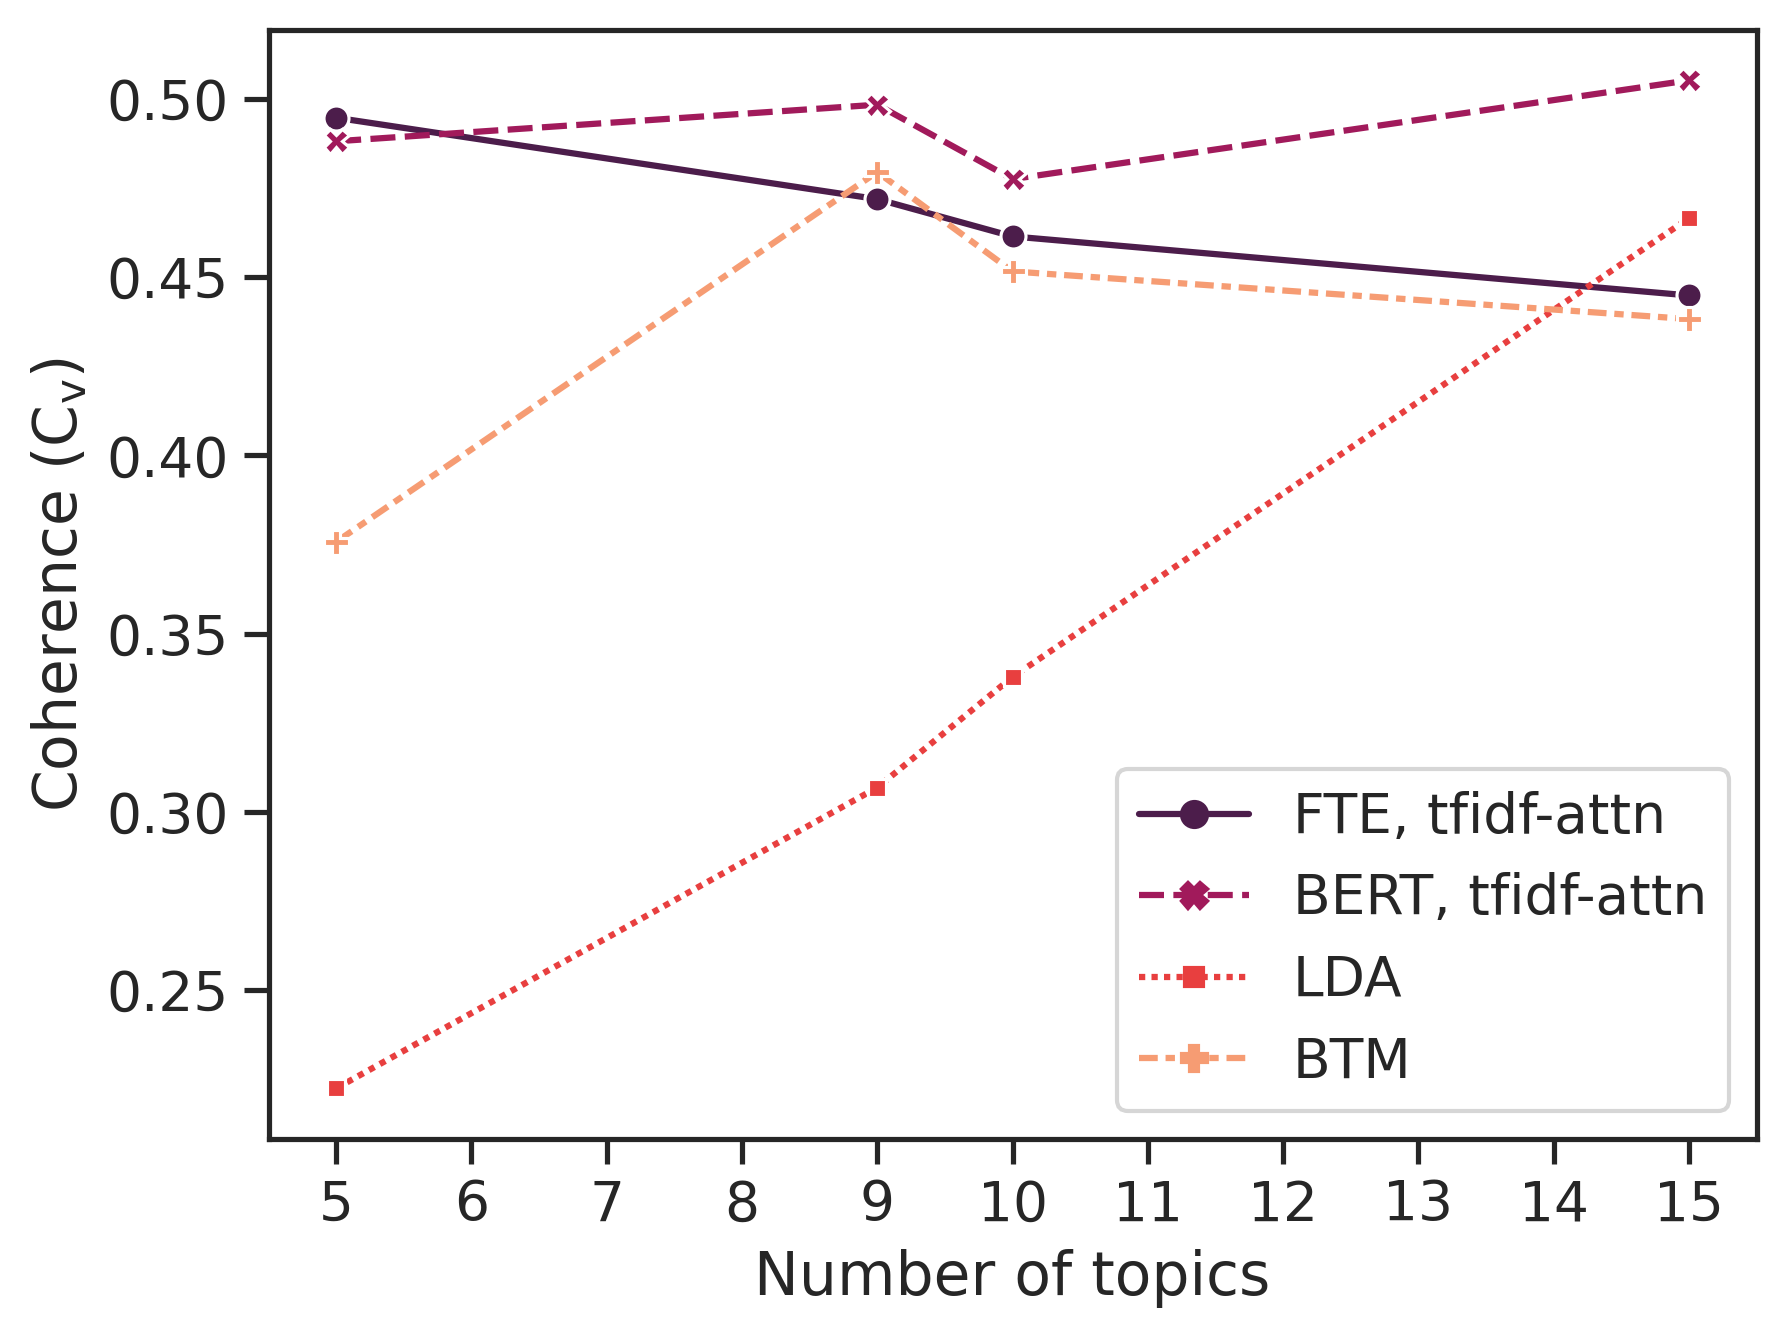

In [ ]:
Image('CV_plot_best_FTA_vs_baselines.png')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


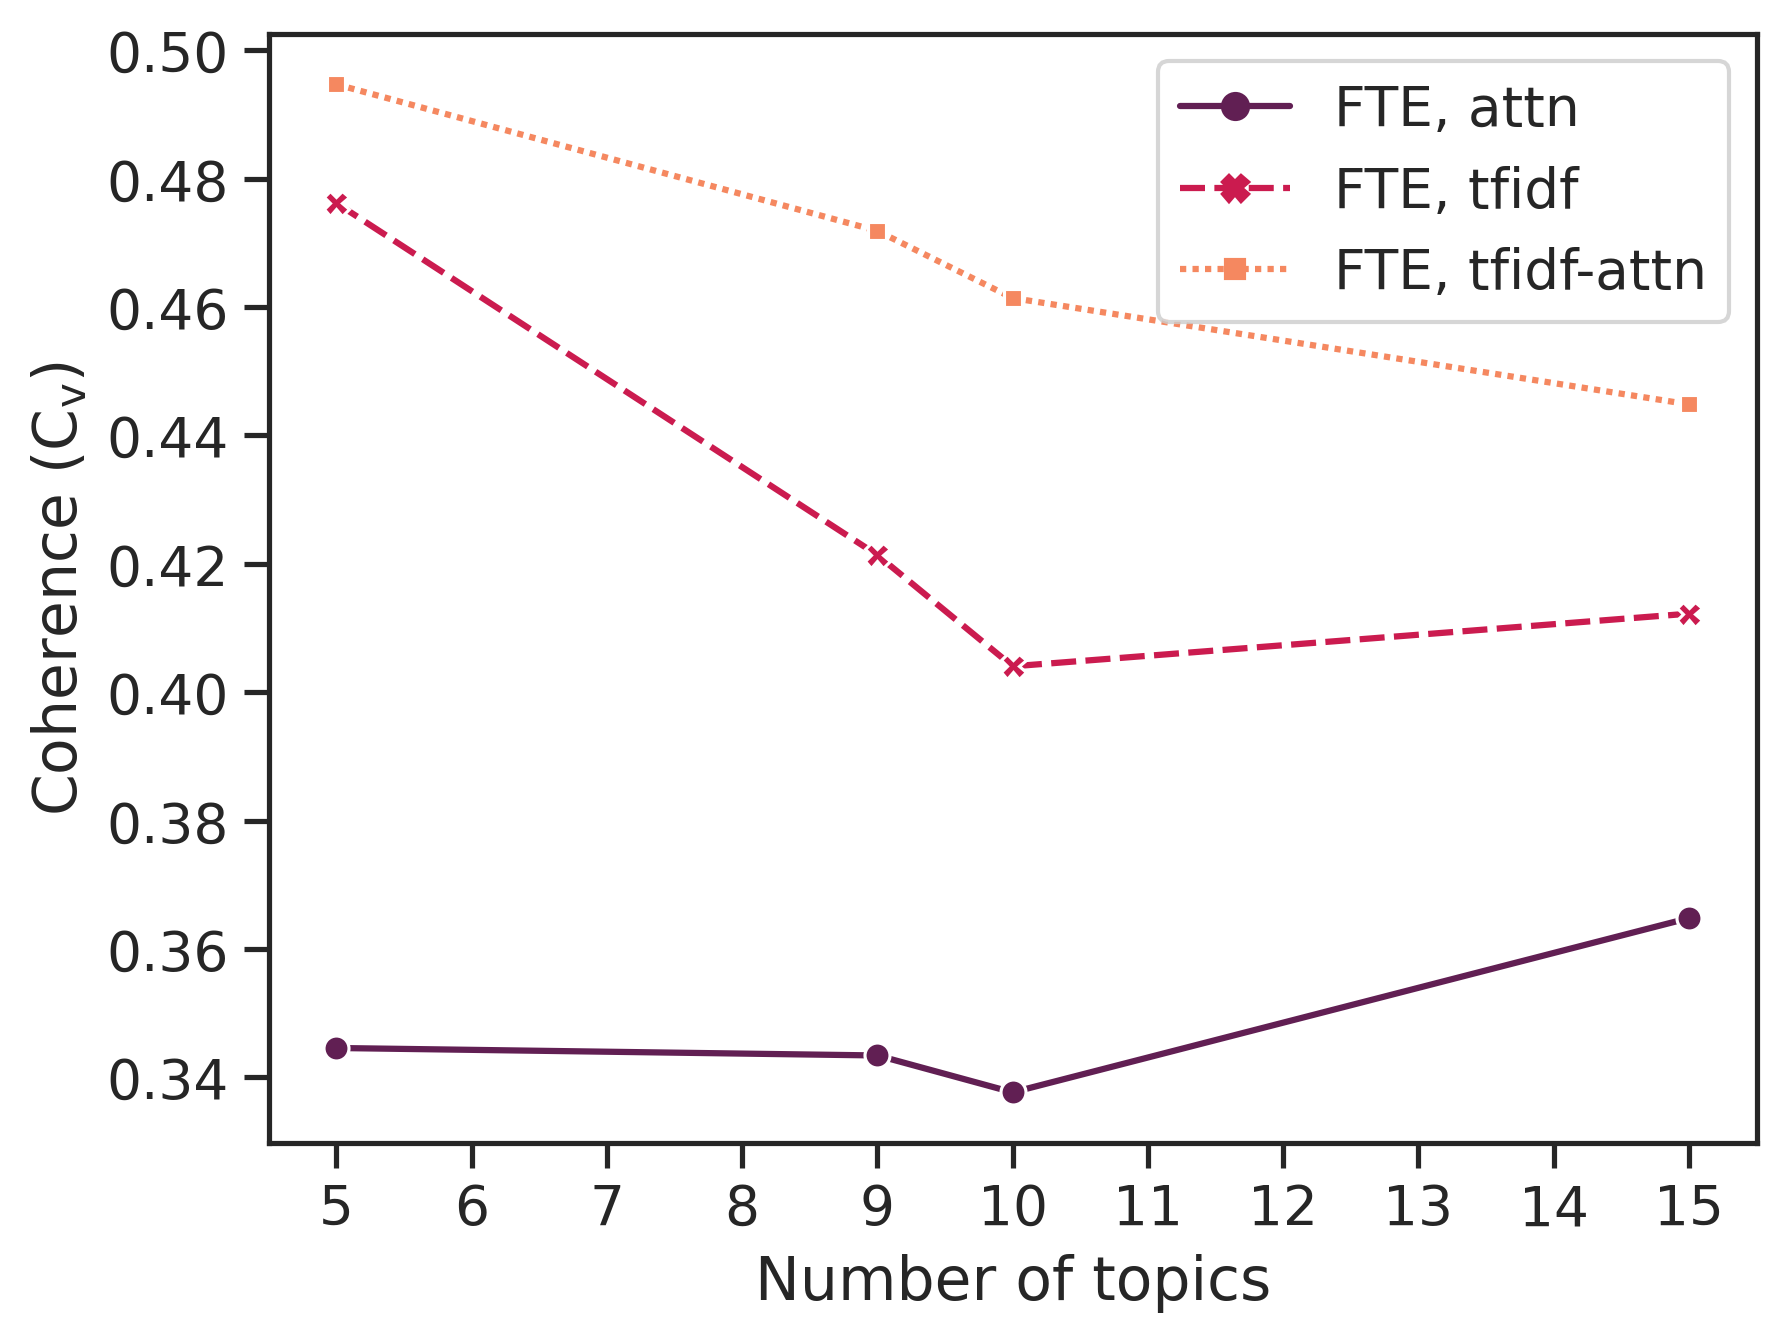

In [ ]:
Image('CV_plot_FTA.png')